In [493]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
from datetime import datetime, timedelta
import seaborn as sns
import statsmodels.api as sm
from scipy.spatial.distance import euclidean
import sys
from sklearn.preprocessing import MinMaxScaler
import math

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



# Any results you write to the current directory are saved as output.
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
import itertools
import sklearn
import scipy
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller


In [494]:
df_crimes = pd.read_csv(r"C:\Users\Dvir\Desktop\crime.csv", encoding='ISO-8859-1')

In [495]:
df_crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
INCIDENT_NUMBER        319073 non-null object
OFFENSE_CODE           319073 non-null int64
OFFENSE_CODE_GROUP     319073 non-null object
OFFENSE_DESCRIPTION    319073 non-null object
DISTRICT               317308 non-null object
REPORTING_AREA         319073 non-null object
SHOOTING               1019 non-null object
OCCURRED_ON_DATE       319073 non-null object
YEAR                   319073 non-null int64
MONTH                  319073 non-null int64
DAY_OF_WEEK            319073 non-null object
HOUR                   319073 non-null int64
UCR_PART               318983 non-null object
STREET                 308202 non-null object
Lat                    299074 non-null float64
Long                   299074 non-null float64
Location               319073 non-null object
dtypes: float64(2), int64(4), object(11)
memory usage: 41.4+ MB


In [496]:
#drop unnessecry columns
df_crimes.drop(columns=['INCIDENT_NUMBER', 'OFFENSE_CODE','UCR_PART'],inplace = True)

In [497]:
#create new column for the date
df_crimes['DATE'] = df_crimes['OCCURRED_ON_DATE'].str.split(" ").str[0]

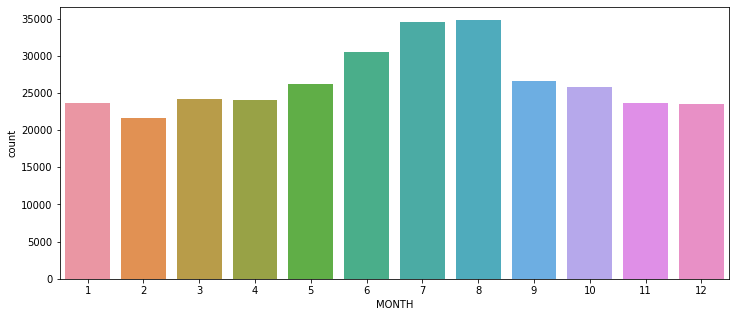

In [498]:
#Number of crimes by hour
plt.figure(figsize = (12,5))
sns.countplot(x = df_crimes.MONTH)
plt.show()

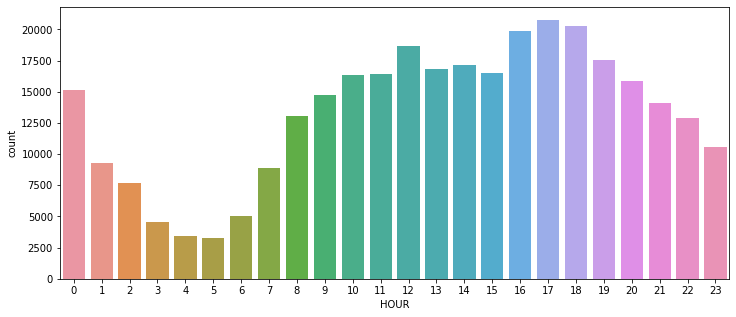

In [499]:
#Number of crimes By month
plt.figure(figsize = (12,5))
sns.countplot(x = df_crimes.HOUR)
plt.show()

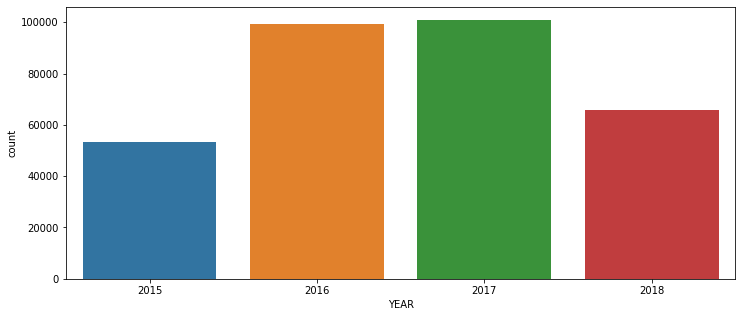

In [500]:
#Number of crimes by year
plt.figure(figsize = (12,5))
sns.countplot(x = df_crimes.YEAR)
plt.show()

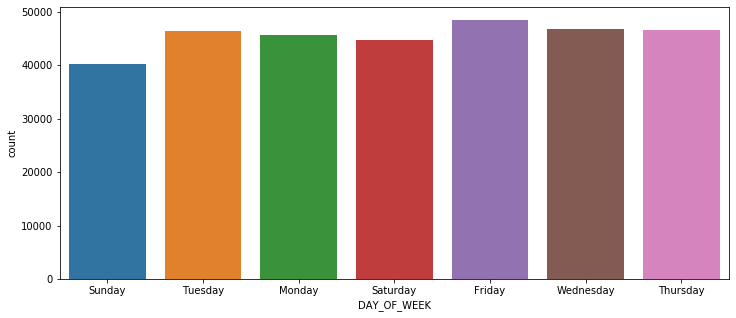

In [501]:
#Number of crimes By day
plt.figure(figsize = (12,5))
sns.countplot(x = df_crimes.DAY_OF_WEEK)
plt.show()

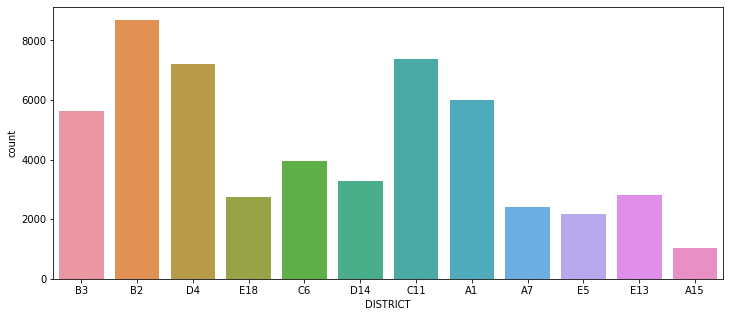

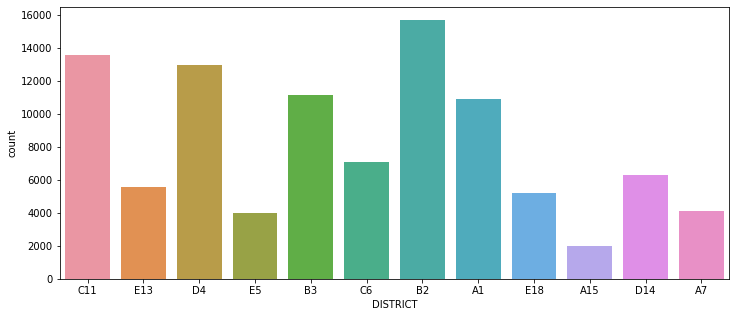

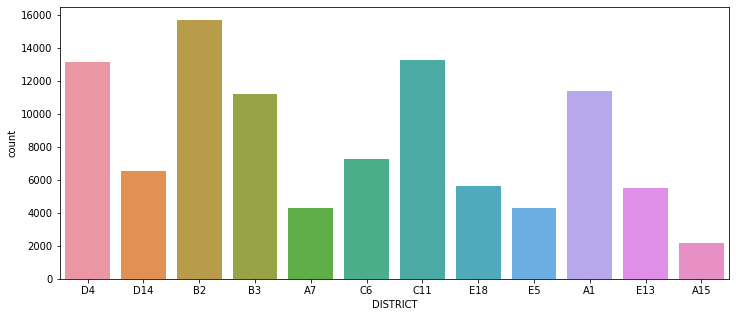

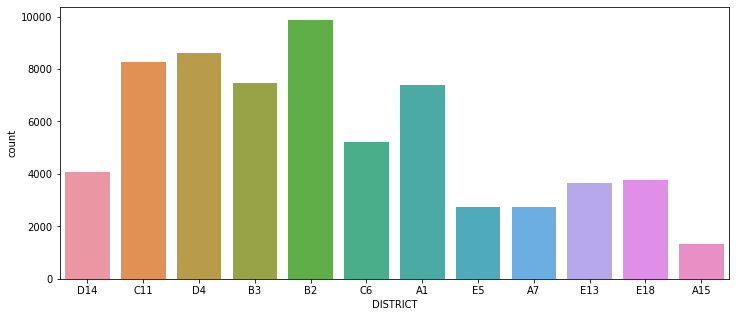

In [502]:
#Number of crimes by year for each district

#2015
plt.figure(figsize = (12,5))
sns.countplot(x = df_crimes['DISTRICT'].loc[df_crimes['YEAR']==2015])
plt.show()
#2016
plt.figure(figsize = (12,5))
sns.countplot(x = df_crimes['DISTRICT'].loc[df_crimes['YEAR']==2016])
plt.show()
#2017
plt.figure(figsize = (12,5))
sns.countplot(x = df_crimes['DISTRICT'].loc[df_crimes['YEAR']==2017])
plt.show()

#2018
plt.figure(figsize = (12,5))
sns.countplot(x = df_crimes['DISTRICT'].loc[df_crimes['YEAR']==2018])
plt.show()


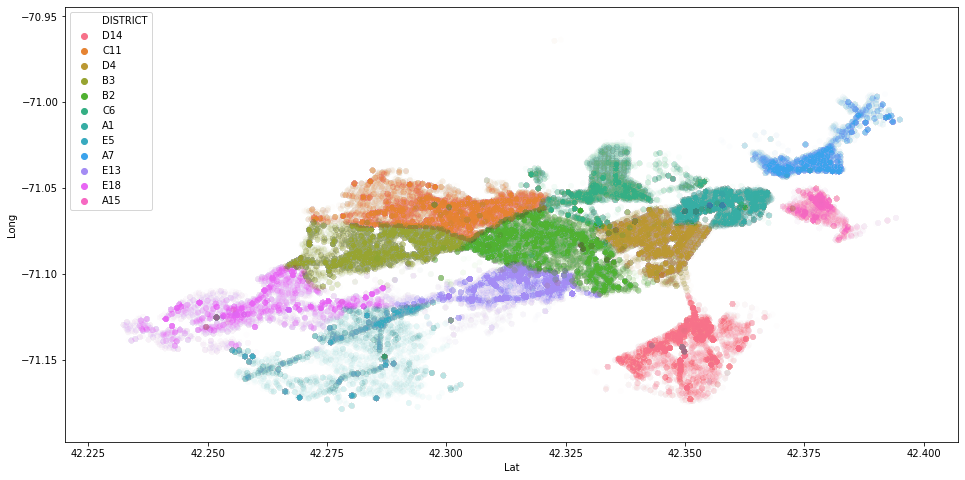

In [503]:
#Heatmap by number of crimes by district

df_crimes.Lat.replace(-1, None, inplace=True) #replace -1 values to none
df_crimes.Long.replace(-1, None, inplace=True) #replace -1 values to none
fig = plt.figure(figsize=(16,8))
sns.scatterplot(x='Lat',
               y='Long',
                hue='DISTRICT',
                alpha=0.01,
               data=df_crimes)
plt.legend(loc=2)

In [504]:
#FUNCTIONS

def createdf(c1,d1,c2,d2):
    dic = {c1:d1,c2:d2}
    df = pd.DataFrame(dic)
    return df
# plot line chart
def lineplt(x,y,xlabel,ylabel,title,size,tick_spacing):
    fig,ax=plt.subplots(figsize = size)
    plt.plot(x,y)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    plt.xlabel(xlabel,fontsize = 15)
    plt.ylabel(ylabel,fontsize = 15)
    plt.title(title,fontsize = 20)
    plt.show()
    
def plthis(d,bin, title):
    plt.figure(figsize=(10,8))
    plt.hist(d, bins=bin)
    plt.title(title, fontsize = 20)
    plt.show()
    
def test_stationarity(series,mlag = 365, lag = None,):
    print('ADF Test Result')
    res = adfuller(series, maxlag = mlag, autolag = lag)
    output = pd.Series(res[0:4],index = ['Test Statistic', 'p value', 'used lag', 'Number of observations used'])
    for key, value in res[4].items():
        output['Critical Value ' + key] = value
    print(output)


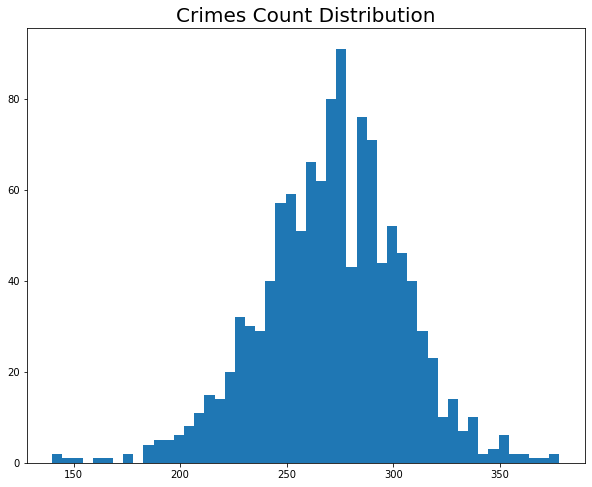

skewness is -0.23642018110351762
kurtosis is 0.6916671057308545


,Date,Count
2016-09-01,2016-09-01,378
2017-09-01,2017-09-01,376
2018-06-15,2018-06-15,372
2017-09-22,2017-09-22,368
2017-08-04,2017-08-04,361


In [505]:
#Create new DataFrame of the crimes for each day
crimes_count = createdf("Date",df_crimes["DATE"].value_counts().index,"Count",df_crimes["DATE"].value_counts())
plthis(crimes_count["Count"],50, "Crimes Count Distribution")
print('skewness is ' + str(crimes_count['Count'].skew()))
print('kurtosis is ' + str(crimes_count ['Count'].kurt()))

crimes_count .head(5)



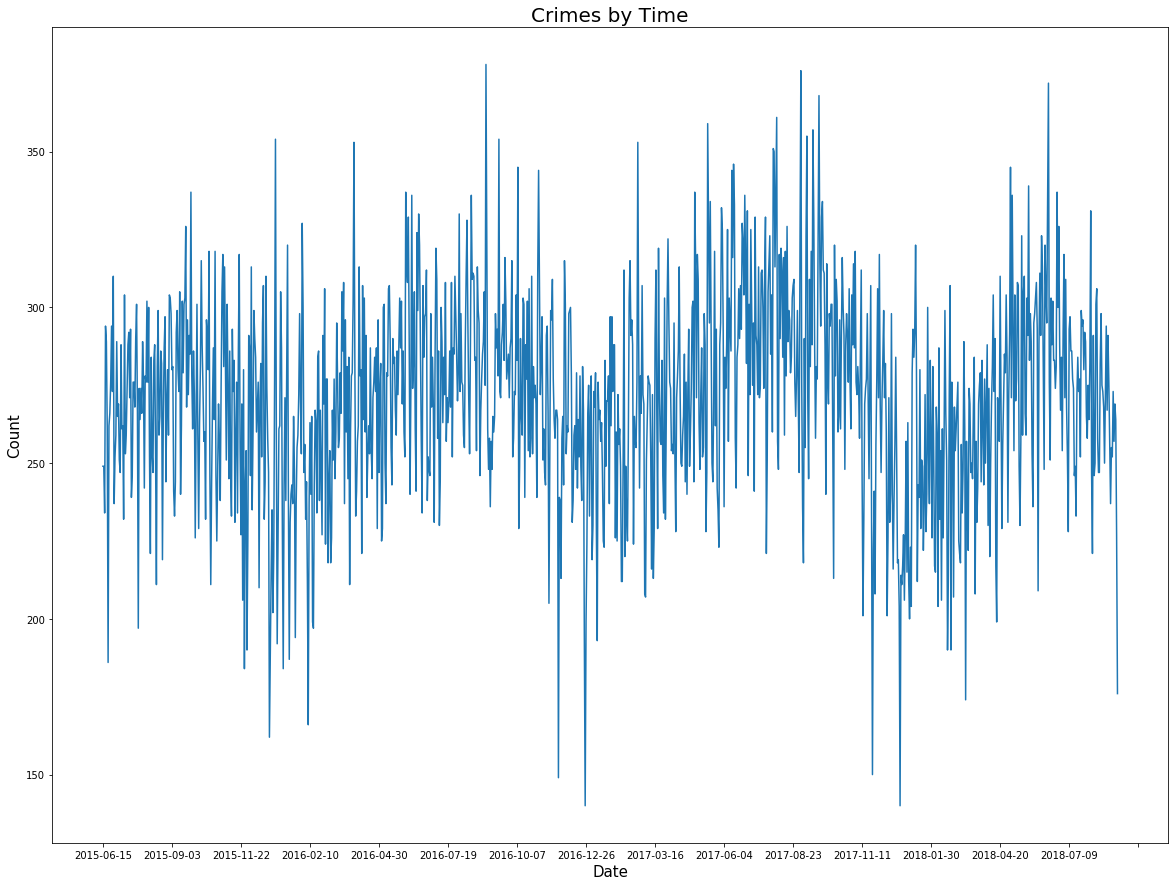

ADF Test Result
Test Statistic                   -2.237273
p value                           0.192997
used lag                         34.000000
Number of observations used    1142.000000
Critical Value 1%                -3.436089
Critical Value 5%                -2.864074
Critical Value 10%               -2.568119
dtype: float64


In [506]:
#plot the number of crimes per day for each day
c=c.sort_values(by="Date",ascending = True)
lineplt(c["Date"],c["Count"],"Date","Count","Crimes by Time",(20,15),80)
#Test the stationarity of the data
test_stationarity(c['Count'],lag = 'AIC')

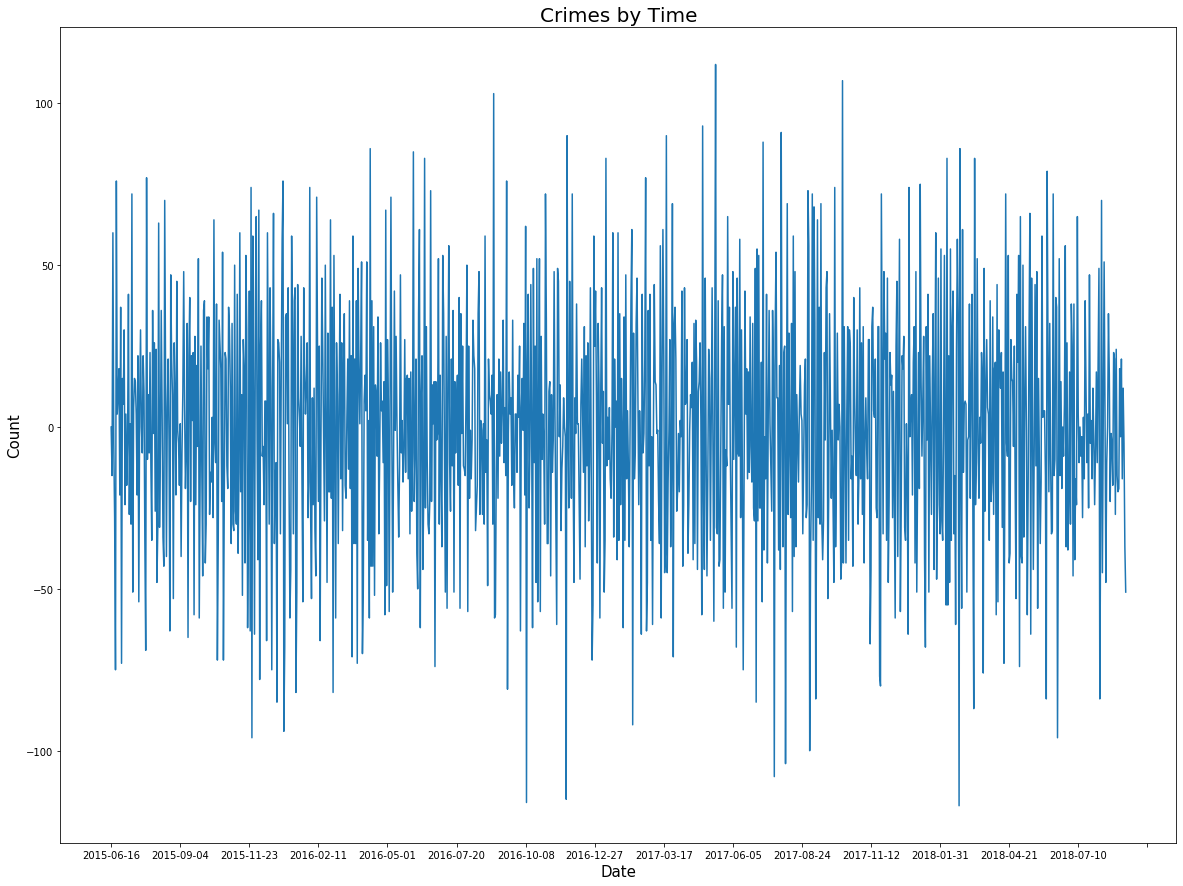

Average= -0.06207482993197279
Std= 37.349601593334036
SE= 1.0891364999989281
ADF Test Result
Test Statistic                -9.988185e+00
p value                        2.029010e-17
used lag                       3.300000e+01
Number of observations used    1.142000e+03
Critical Value 1%             -3.436089e+00
Critical Value 5%             -2.864074e+00
Critical Value 10%            -2.568119e+00
dtype: float64
None


In [507]:
d1 = c.copy()

#create new values in the DataFreame with the diffrncial between two days
d1['Count'] = d1['Count'].diff(1)
d1 = d1.dropna()
lineplt(d1["Date"],d1["Count"],"Date","Count","Crimes by Time",(20,15),80)
print('Average= '+str(d1['Count'].mean()))
print('Std= ' + str(d1['Count'].std()))
print('SE= ' + str(d1['Count'].std()/math.sqrt(len(d1))))
print(test_stationarity(d1['Count'],lag = 'AIC'))
                    

In [510]:
#ARMA MODEL

timeseries = c['Count']
train_start = datetime(2018,5,1)
train_end = datetime(2018,8,9) # the end of our train data
train_data = timeseries[:train_end]
test_data = timeseries[train_end + timedelta(days=1):]


TypeError: '<' not supported between instances of 'str' and 'datetime.datetime'

In [511]:
arma_mod = ARMA(train_data,(3,1,2)).fit()
summary = (arma_mod.summary2(alpha=.05, float_format="%.8f"))
print(summary)

                           Results: ARMA
Model:              ARMA             BIC:                 11127.5125
Dependent Variable: Count            Log-Likelihood:      -5542.6   
Date:               2020-08-11 19:14 Scale:               1.0000    
No. Observations:   1152             Method:              css-mle   
Df Model:           5                Sample:              06-15-2015
Df Residuals:       1147                                  08-09-2018
Converged:          1.0000           S.D. of innovations: 29.726    
No. Iterations:     24.0000          HQIC:                11108.652 
AIC:                11097.2169                                      
---------------------------------------------------------------------
              Coef.    Std.Err.     t      P>|t|    [0.025    0.975] 
---------------------------------------------------------------------
const        270.9899    5.4823   49.4299  0.0000  260.2448  281.7351
ar.L1.Count    1.2012    0.0318   37.7774  0.0000    1.138

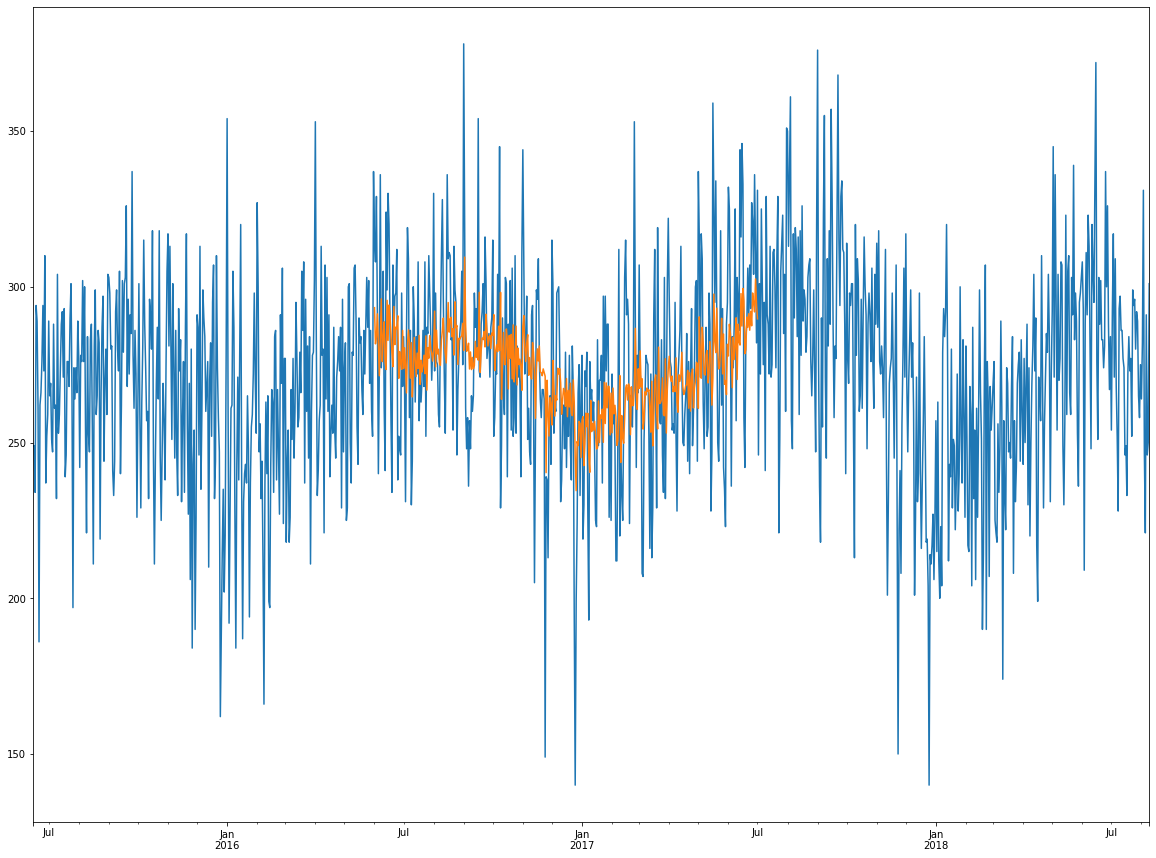

In [512]:
predict_data = arma_mod.predict(start='2016-06-01', end='2017-07-01', dynamic = False)
timeseries.index = pd.DatetimeIndex(timeseries.index)
fig, ax = plt.subplots(figsize=(20, 15))
ax = train_data.plot(ax=ax)
predict_data.plot(ax=ax)
plt.show()


Mean Absolute Percent Error :  0.08


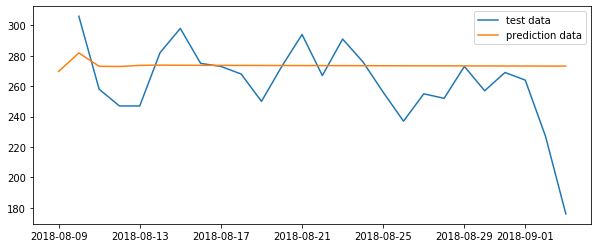

In [513]:
predict_data = arma_mod.predict(start = '2018-08-09', end = '2018-09-03', dynamic = False)
fig = plt.figure(figsize= (10,4))
plt.plot(test_data,label = 'test data')
plt.plot(predict_data,label = 'prediction data')
plt.legend(loc = 'upper right')

residuals = test_data - predict_data

print("Mean Absolute Percent Error : ", round(np.mean(abs(residuals/test_data)),4))

In [514]:
#SARIMA MODEL
#In this model, we will try all combinations of (p,d,q) and (P,D,Q,7) and use AIC standard to find the best combination that can minimize AIC. I use "7" becasue the period is 7 days.
p = d = q = range(0, 2)
 
# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))
 
# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]
 
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 7)
SARIMAX: (0, 0, 1) x (0, 1, 0, 7)
SARIMAX: (0, 1, 0) x (0, 1, 1, 7)
SARIMAX: (0, 1, 0) x (1, 0, 0, 7)


In [515]:
res = pd.DataFrame(columns = ['order', 'seasonal_order', 'AIC'])

In [516]:
warnings.filterwarnings("ignore") # specify to ignore warning messages
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(train_data,order=param,seasonal_order=param_seasonal) 
            results = mod.fit()
            data = {'order': param, 'seasonal_order': param_seasonal, 'AIC':results.aic}
            res = res.append(data,ignore_index=True)
        except:
            continue
res = res.sort_values(by = 'AIC', ascending = True)
print(res.head(5))

        order seasonal_order           AIC
63  (1, 1, 1)   (1, 1, 1, 7)  10774.354107
59  (1, 1, 1)   (0, 1, 1, 7)  10775.255171
47  (1, 0, 1)   (1, 1, 1, 7)  10800.023057
31  (0, 1, 1)   (1, 1, 1, 7)  10804.801961
43  (1, 0, 1)   (0, 1, 1, 7)  10804.988195


In [517]:
SARIMA_model=SARIMAX(train_data, order=(1,1,1), seasonal_order=(1,1,1,7)).fit()
summary = SARIMA_model.summary()
print(summary)


                                 Statespace Model Results                                
Dep. Variable:                             Count   No. Observations:                 1152
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood               -5382.177
Date:                           Tue, 11 Aug 2020   AIC                          10774.354
Time:                                   19:15:15   BIC                          10799.566
Sample:                               06-15-2015   HQIC                         10783.873
                                    - 08-09-2018                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1891      0.031      6.093      0.000       0.128       0.250
ma.L1         -0.9307      0.013    -73.750

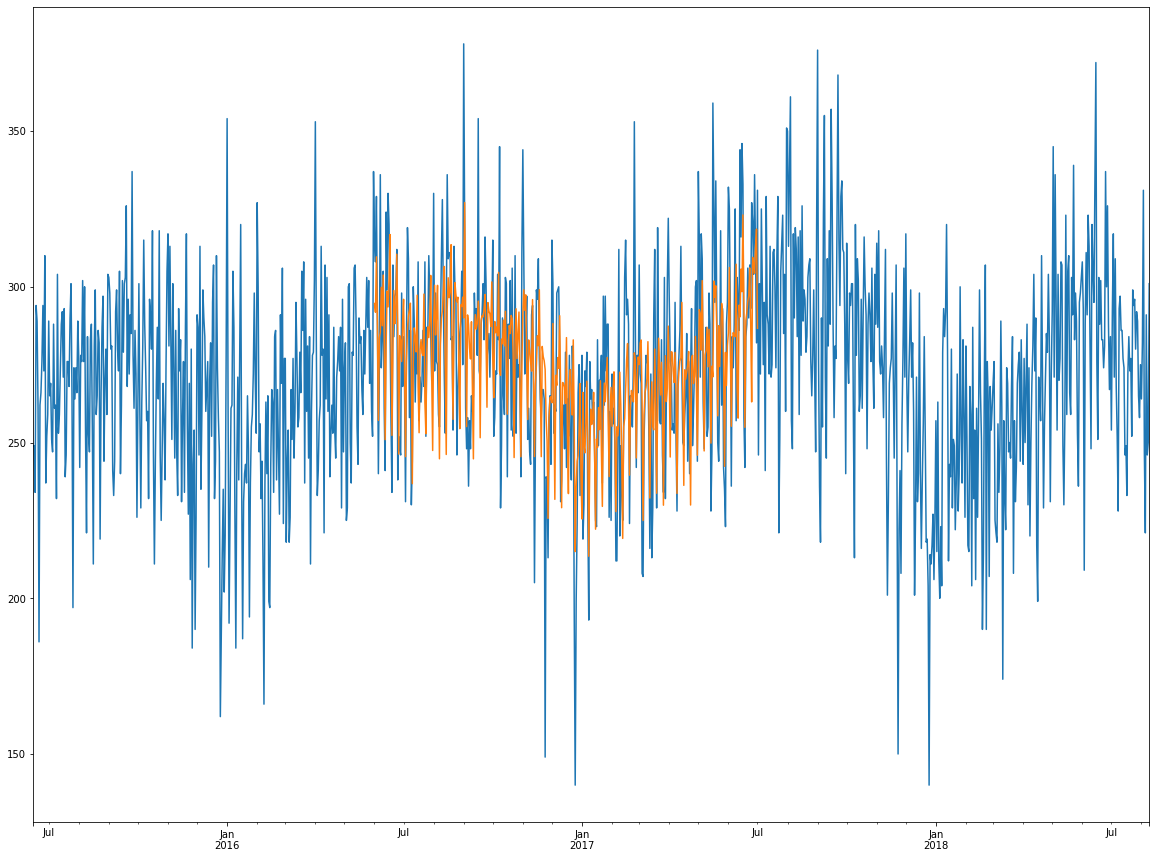

In [518]:
predict_data = SARIMA_model.predict(start='2016-06-01', end='2017-07-01', dynamic = False)
timeseries.index = pd.DatetimeIndex(timeseries.index)
fig, ax = plt.subplots(figsize=(20, 15))
ax = train_data.plot(ax=ax)
predict_data.plot(ax=ax)
plt.show()

Mean Absolute Percent Error :  0.0686


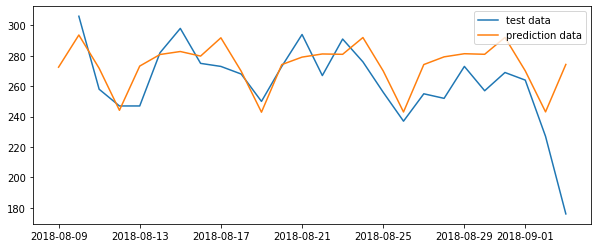

In [519]:
predict_data = SARIMA_model.predict(start = '2018-08-09', end = '2018-09-03', dynamic = False)
fig = plt.figure(figsize= (10,4))
plt.plot(test_data,label = 'test data')
plt.plot(predict_data,label = 'prediction data')
plt.legend(loc = 'upper right')


residuals = test_data - predict_data

print("Mean Absolute Percent Error : ", round(np.mean(abs(residuals/test_data)),4))

In [520]:
AR_model = ARMA(train_data,(1,0)).fit()
summary = (arma_mod.summary2(alpha=.05, float_format="%.8f"))
print(summary)

                           Results: ARMA
Model:              ARMA             BIC:                 11127.5125
Dependent Variable: Count            Log-Likelihood:      -5542.6   
Date:               2020-08-11 19:15 Scale:               1.0000    
No. Observations:   1152             Method:              css-mle   
Df Model:           5                Sample:              06-15-2015
Df Residuals:       1147                                  08-09-2018
Converged:          1.0000           S.D. of innovations: 29.726    
No. Iterations:     24.0000          HQIC:                11108.652 
AIC:                11097.2169                                      
---------------------------------------------------------------------
              Coef.    Std.Err.     t      P>|t|    [0.025    0.975] 
---------------------------------------------------------------------
const        270.9899    5.4823   49.4299  0.0000  260.2448  281.7351
ar.L1.Count    1.2012    0.0318   37.7774  0.0000    1.138

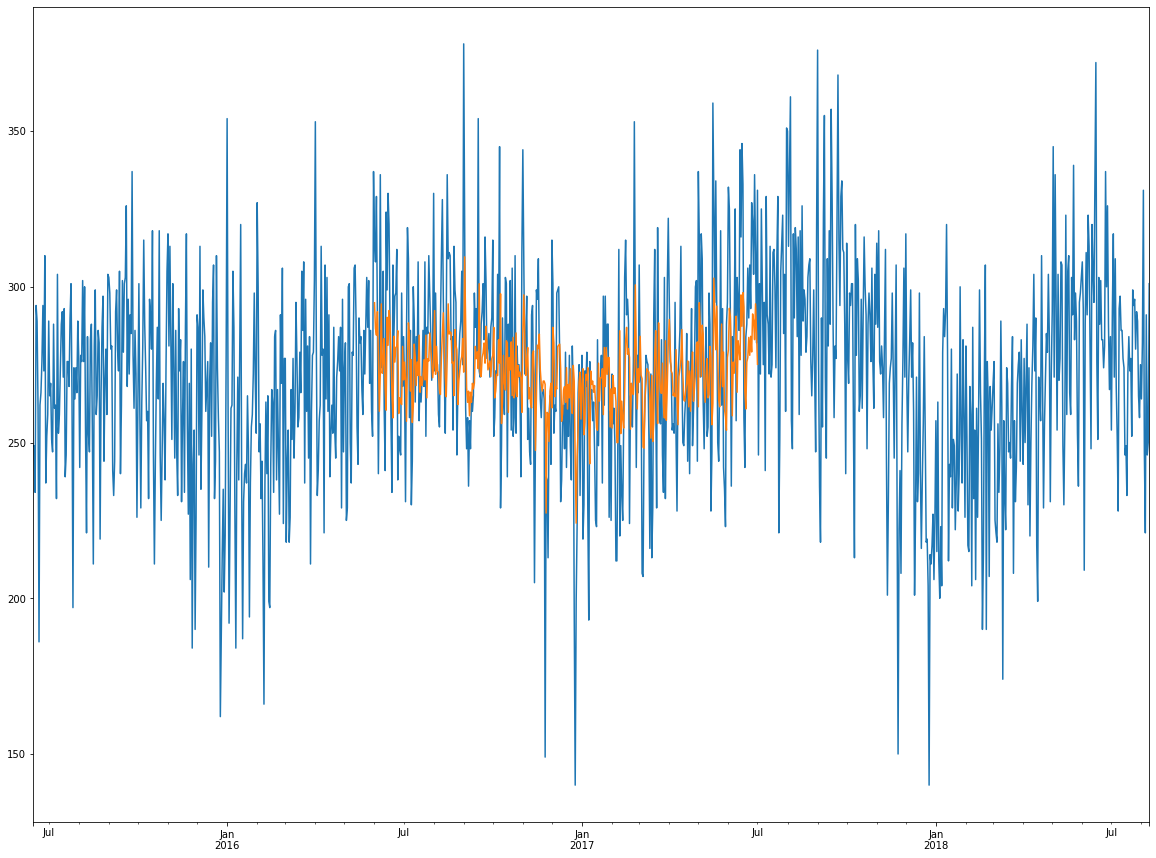

In [521]:
predict_data = AR_model.predict(start='2016-06-01', end='2017-07-01', dynamic = False)
timeseries.index = pd.DatetimeIndex(timeseries.index)
fig, ax = plt.subplots(figsize=(20, 15))
ax = train_data.plot(ax=ax)
predict_data.plot(ax=ax)
plt.show()

Mean Absolute Percent Error :  0.0783


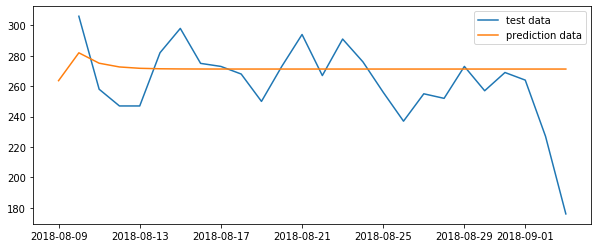

In [522]:
predict_data = AR_model.predict(start = '2018-08-09', end = '2018-09-03', dynamic = False)
fig = plt.figure(figsize= (10,4))
plt.plot(test_data,label = 'test data')
plt.plot(predict_data,label = 'prediction data')
plt.legend(loc = 'upper right')
residuals = test_data - predict_data

print("Mean Absolute Percent Error : ", round(np.mean(abs(residuals/test_data)),4))

In [523]:
MA_model = ARMA(train_data,(0,3)).fit()
summary = (MA_model.summary2(alpha=.05, float_format="%.8f"))
print(summary)

                           Results: ARMA
Model:              ARMA             BIC:                 11207.4234
Dependent Variable: Count            Log-Likelihood:      -5586.1   
Date:               2020-08-11 19:15 Scale:               1.0000    
No. Observations:   1152             Method:              css-mle   
Df Model:           4                Sample:              06-15-2015
Df Residuals:       1148                                  08-09-2018
Converged:          1.0000           S.D. of innovations: 30.877    
No. Iterations:     14.0000          HQIC:                11191.706 
AIC:                11182.1771                                      
---------------------------------------------------------------------
              Coef.    Std.Err.     t      P>|t|    [0.025    0.975] 
---------------------------------------------------------------------
const        271.2635    1.4373  188.7299  0.0000  268.4464  274.0806
ma.L1.Count    0.3322    0.0290   11.4560  0.0000    0.275

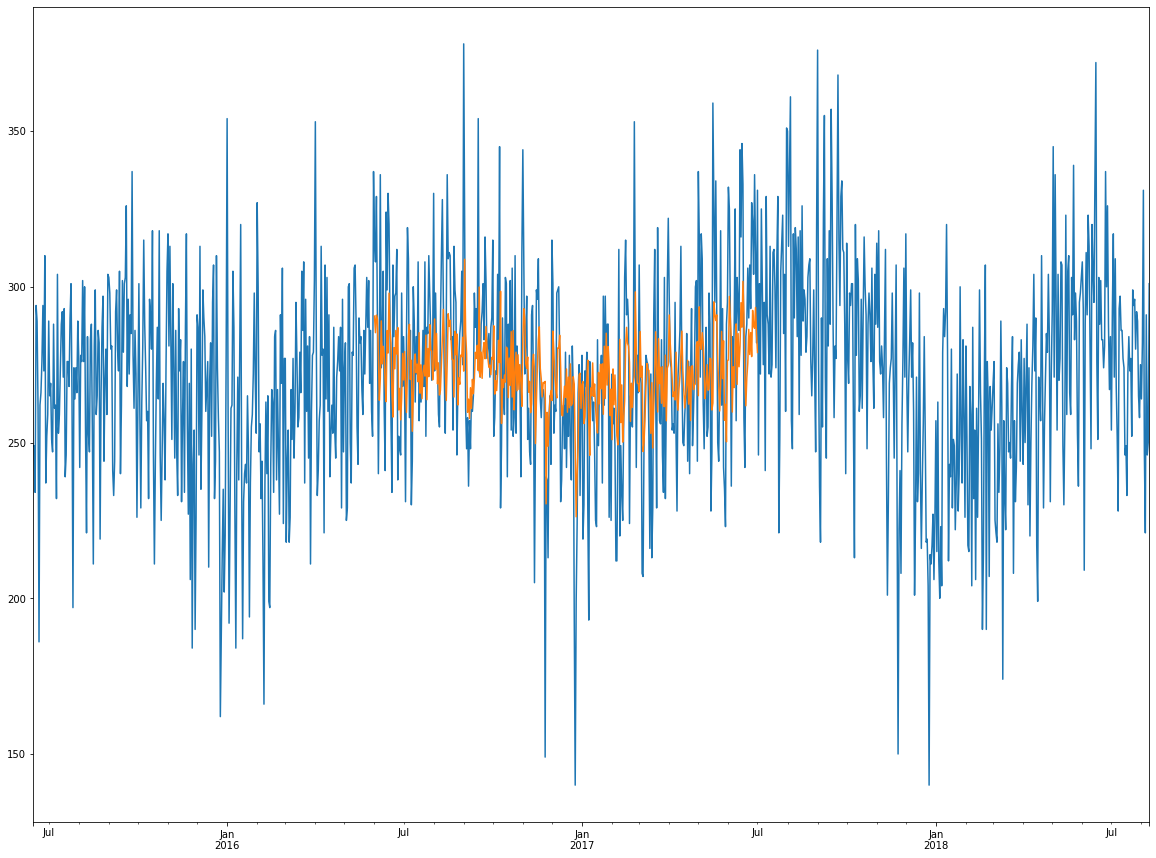

In [524]:
predict_data = MA_model.predict(start='2016-06-01', end='2017-07-01', dynamic = False)
timeseries.index = pd.DatetimeIndex(timeseries.index)
fig, ax = plt.subplots(figsize=(20, 15))
ax = train_data.plot(ax=ax)
predict_data.plot(ax=ax)
plt.show()

Mean Absolute Percent Error :  0.079


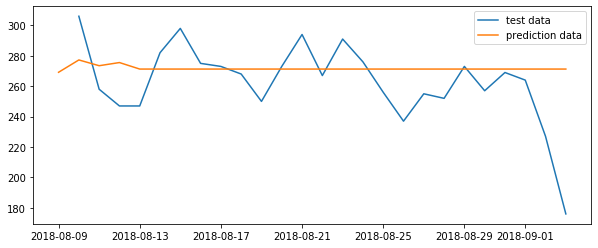

In [525]:
predict_data = MA_model.predict(start = '2018-08-09', end = '2018-09-03', dynamic = False)
fig = plt.figure(figsize= (10,4))
plt.plot(test_data,label = 'test data')
plt.plot(predict_data,label = 'prediction data')
plt.legend(loc = 'upper right')

residuals = test_data - predict_data

print("Mean Absolute Percent Error : ", round(np.mean(abs(residuals/test_data)),4))